In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,auc,ConfusionMatrixDisplay

In [4]:
fp_aac = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/fp_aac.csv')
fp_aac1 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_aac.csv')
fp_aac2 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_aac2.csv')
fp_aac3 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_aac3.csv')
fp_dc = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/fp_dc.csv')
fp_dc1 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_dc.csv')
fp_dc2 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_dc2.csv')

In [5]:
fp_dc3 = pd.read_csv('/content/drive/MyDrive/Skripsi/Program/data/dtp/balanced_fp_dc3.csv')

Random AAC

In [6]:
fp_aac1

,aac_1,aac_2,aac_3,aac_4,aac_5,aac_6,aac_7,aac_8,aac_9,aac_10,...,872,873,874,875,876,877,878,879,880,interaction
0,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49311,0.041841,0.062762,0.113333,0.064444,0.070513,0.044872,0.051282,0.087179,0.046443,0.058300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49312,0.041841,0.062762,0.113333,0.064444,0.070513,0.044872,0.051282,0.087179,0.046443,0.058300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49313,0.112971,0.092050,0.046667,0.108889,0.185897,0.108974,0.061538,0.076923,0.075099,0.109684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49314,0.025105,0.050209,0.071111,0.066667,0.006410,0.032051,0.051282,0.071795,0.041502,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
X_aac1 = fp_aac1.iloc[:,:-1]
y_aac1 = fp_aac1.iloc[:,-1:]
X_aac1

,aac_1,aac_2,aac_3,aac_4,aac_5,aac_6,aac_7,aac_8,aac_9,aac_10,...,871,872,873,874,875,876,877,878,879,880
0,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.071130,0.016736,0.048889,0.064444,0.108974,0.000000,0.082051,0.102564,0.057312,0.046443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49311,0.041841,0.062762,0.113333,0.064444,0.070513,0.044872,0.051282,0.087179,0.046443,0.058300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49312,0.041841,0.062762,0.113333,0.064444,0.070513,0.044872,0.051282,0.087179,0.046443,0.058300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49313,0.112971,0.092050,0.046667,0.108889,0.185897,0.108974,0.061538,0.076923,0.075099,0.109684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49314,0.025105,0.050209,0.071111,0.066667,0.006410,0.032051,0.051282,0.071795,0.041502,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_aac1

,interaction
0,1
1,1
2,1
3,1
4,1
...,...
49311,1
49312,1
49313,1
49314,1


In [9]:
X_train_aac1, X_test_aac1, y_train_aac1, y_test_aac1 = train_test_split(X_aac1,y_aac1,test_size = 0.3, random_state = 42)

In [10]:
rf = RandomForestClassifier()

In [11]:
n_estimators = [10,50,100]
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3]

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf}

In [12]:
rf_random = GridSearchCV(estimator = rf, param_grid = grid,
                         cv = 2, scoring ='f1', verbose=10)

In [13]:
rf_random.fit(X_train_aac1,y_train_aac1)
print('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.835 total time=   0.7s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.845 total time=   0.6s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.853 total time=   2.0s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.845 total time=   2.0s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.851 total time=   3.8s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.846 total time=   5.1s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.844 total time=   0.5s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.844 total time=   0.7s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.847 total time=   2.5s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.842 total time=   2.0s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.850 total time=   3.8s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.845 total time=   5.1s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.836 total time=   0.5s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.839 total time=   0.6s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.844 total time=   1.9s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.843 total time=   1.9s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.843 total time=   3.7s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.841 total time=   5.2s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.845 total time=   0.5s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.840 total time=   0.5s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.848 total time=   1.9s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.844 total time=   2.0s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.849 total time=   3.7s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.843 total time=   4.9s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.839 total time=   0.8s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.836 total time=   0.6s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.847 total time=   1.9s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.844 total time=   2.0s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.845 total time=   3.7s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.841 total time=   4.5s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.840 total time=   0.7s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.835 total time=   0.8s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.843 total time=   2.1s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.839 total time=   1.9s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.843 total time=   3.7s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.841 total time=   4.1s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.840 total time=   0.8s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.7s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.844 total time=   2.6s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.839 total time=   1.9s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.846 total time=   3.7s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.840 total time=   3.7s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.839 total time=   0.7s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.838 total time=   0.8s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.841 total time=   2.8s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.840 total time=   2.0s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.844 total time=   3.7s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.840 total time=   3.7s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.841 total time=   0.5s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.836 total time=   0.6s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.843 total time=   2.8s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.838 total time=   2.4s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.844 total time=   3.6s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.837 total time=   3.8s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.922 total time=   0.9s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.923 total time=   1.1s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.926 total time=   5.4s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.924 total time=   4.0s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.926 total time=  10.4s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.924 total time=   8.2s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.9s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.906 total time=   1.2s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.914 total time=   4.8s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.914 total time=   3.6s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.915 total time=   7.9s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.915 total time=   7.7s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.892 total time=   0.8s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.890 total time=   0.8s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.902 total time=   3.6s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.904 total time=   4.4s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.902 total time=   6.4s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   7.9s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.898 total time=   0.8s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.8s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.904 total time=   3.4s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.899 total time=   3.4s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.902 total time=   8.1s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.903 total time=   6.7s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.895 total time=   1.0s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.890 total time=   1.2s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.899 total time=   4.3s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.899 total time=   3.4s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.901 total time=   7.0s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.899 total time=   7.4s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.883 total time=   0.8s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.880 total time=   0.8s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.891 total time=   3.1s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.889 total time=   4.2s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.891 total time=   6.5s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.891 total time=   6.7s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.883 total time=   1.1s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.882 total time=   1.1s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.889 total time=   3.3s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.886 total time=   3.9s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.889 total time=   7.6s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.888 total time=   6.2s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.881 total time=   0.8s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.883 total time=   0.7s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.888 total time=   3.5s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.890 total time=   4.3s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.890 total time=   6.2s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.890 total time=   7.4s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.874 total time=   0.8s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.874 total time=   0.7s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.885 total time=   3.0s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.882 total time=   3.0s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.883 total time=   7.3s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.885 total time=  12.6s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.921 total time=   3.4s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.922 total time=   1.6s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.924 total time=   6.2s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.925 total time=   5.2s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=   8.5s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   9.5s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.908 total time=   0.9s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.9s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.914 total time=   3.6s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.916 total time=   4.2s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.917 total time=   8.0s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.914 total time=  11.4s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.893 total time=   0.8s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.892 total time=   0.8s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.903 total time=   3.3s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.903 total time=   3.3s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.903 total time=   8.0s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.904 total time=   6.5s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.895 total time=   1.0s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.893 total time=   1.2s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.901 total time=   4.3s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.898 total time=   3.4s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   7.4s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.901 total time=   7.7s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.890 total time=   0.8s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.891 total time=   0.8s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.901 total time=   4.2s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.901 total time=   4.3s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.902 total time=   6.6s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.900 total time=   8.0s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.885 total time=   0.8s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.883 total time=   0.8s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.891 total time=   3.6s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.889 total time=   3.1s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.892 total time=   7.5s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.893 total time=   6.1s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.884 total time=   0.8s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.881 total time=   0.8s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.890 total time=   4.4s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.888 total time=   3.3s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.888 total time=   6.2s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.891 total time=   7.6s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.880 total time=   0.8s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.882 total time=   0.8s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.889 total time=   3.2s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.890 total time=   3.1s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.891 total time=   7.6s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.888 total time=   6.1s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.882 total time=   0.8s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.880 total time=   1.0s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.885 total time=   4.1s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.884 total time=   3.0s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.884 total time=   6.2s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.883 total time=   7.3s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.919 total time=   1.0s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.919 total time=   1.0s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.926 total time=   4.1s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.924 total time=   5.2s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=   8.3s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.926 total time=   9.5s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.8s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.908 total time=   0.9s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.916 total time=   3.6s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.915 total time=   5.5s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.917 total time=   7.5s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.916 total time=   8.4s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.891 total time=   0.8s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.897 total time=   0.8s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.901 total time=   3.3s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.899 total time=   3.3s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.903 total time=   7.9s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.905 total time=   6.4s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.8s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.895 total time=   0.8s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.902 total time=   4.8s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.900 total time=   3.4s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.902 total time=   6.7s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.901 total time=   8.4s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.894 total time=   0.8s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.894 total time=   0.8s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.899 total time=   3.4s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.898 total time=   4.4s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.901 total time=   6.9s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.899 total time=   7.4s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.884 total time=   1.1s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.885 total time=   0.8s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.892 total time=   3.1s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.889 total time=   3.1s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.892 total time=   7.3s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.890 total time=   6.2s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.883 total time=   0.7s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.883 total time=   0.7s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.888 total time=   3.3s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.886 total time=   4.4s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.890 total time=   6.2s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.890 total time=   7.4s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.880 total time=   0.9s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.879 total time=   0.8s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.888 total time=   3.5s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.886 total time=   3.7s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.890 total time=   7.7s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.889 total time=   6.1s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.879 total time=   0.7s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.876 total time=   0.7s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.885 total time=   4.0s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.882 total time=   3.5s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.886 total time=   5.9s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.885 total time=   7.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  



In [14]:
model_aac1 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_aac1.fit(X_train_aac1,y_train_aac1)
y_pred_aac1 = model_aac1.predict(X_test_aac1)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,auc,ConfusionMatrixDisplay
print("Classification Report")
print(classification_report(y_pred_aac1,y_test_aac1))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6897
           1       0.99      0.93      0.96      7898

    accuracy                           0.96     14795
   macro avg       0.96      0.96      0.96     14795
weighted avg       0.96      0.96      0.96     14795



In [16]:
print("Accuracy:",accuracy_score(y_pred_aac1,y_test_aac1))
print("Precision :",precision_score(y_pred_aac1,y_test_aac1))
print("Recall :",recall_score(y_pred_aac1,y_test_aac1))
print("F-1 Score : ",f1_score(y_pred_aac1,y_test_aac1))
print("AUROC:", roc_auc_score(y_pred_aac1,y_test_aac1))

Accuracy: 0.9572152754308888
Precision : 0.9869955758144523
Recall : 0.932134717650038
F-1 Score :  0.9587810119163899
AUROC: 0.9590353159078087


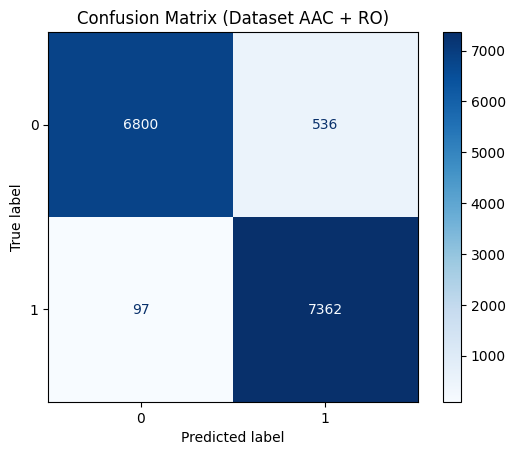

In [22]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_aac1, y_pred_aac1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset AAC + RO)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_aac_ro.pkl', 'wb') as model_file:
    pickle.dump(model_aac1, model_file)

print("Model berhasil disimpan sebagai 'random_forest_aac_ro.pkl'")

Model berhasil disimpan sebagai 'random_forest_aac_ro.pkl'


SMOTE AAC

In [23]:
# Random AAC2
X_aac2 = fp_aac2.iloc[:,:-1]
y_aac2 = fp_aac2.iloc[:,-1:]

X_train_aac2, X_test_aac2, y_train_aac2, y_test_aac2 = train_test_split(X_aac2,y_aac2,test_size = 0.3, random_state = 42)

rf_random.fit(X_train_aac2,y_train_aac2)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_aac2 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_aac2.fit(X_train_aac2,y_train_aac2)
y_pred_aac2 = model_aac2.predict(X_test_aac2)

print("Classification Report")
print(classification_report(y_test_aac2,y_pred_aac2)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_aac2,y_pred_aac2))
print("Precision :",precision_score(y_test_aac2,y_pred_aac2))
print("Recall :",recall_score(y_test_aac2,y_pred_aac2))
print("F-1 Score : ",f1_score(y_test_aac2,y_pred_aac2))
print("AUROC:", roc_auc_score(y_test_aac2,y_pred_aac2))


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.899 total time=   3.9s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.896 total time=   1.3s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.905 total time=   3.9s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.904 total time=   6.5s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.901 total time=  11.6s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.903 total time=   4.8s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.898 total time=   0.8s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.891 total time=   0.8s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.902 total time=   2.8s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.900 total time=   4.9s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.900 total time=   9.5s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.902 total time=   5.1s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.902 total time=   0.9s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.899 total time=   0.8s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.900 total time=   2.2s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.899 total time=   4.7s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.900 total time=   7.0s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.898 total time=   9.6s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.897 total time=   0.9s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.7s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.900 total time=   3.2s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.901 total time=   2.2s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.897 total time=   4.7s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.900 total time=   5.0s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.899 total time=   0.5s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.897 total time=   0.6s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.902 total time=   2.1s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.900 total time=   2.1s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.899 total time=   4.9s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.898 total time=   5.3s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.900 total time=   0.5s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.898 total time=   0.6s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.897 total time=   2.2s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.896 total time=   2.1s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.902 total time=   5.4s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.899 total time=   4.3s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.894 total time=   0.5s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.886 total time=   0.6s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.897 total time=   2.1s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.895 total time=   2.2s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.898 total time=   5.6s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.897 total time=   4.8s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.898 total time=   0.7s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.897 total time=   0.5s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.901 total time=   2.1s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.901 total time=   2.4s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.901 total time=   5.4s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.897 total time=   4.2s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.896 total time=   0.6s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.892 total time=   0.6s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.900 total time=   2.2s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.896 total time=   2.7s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.899 total time=   5.1s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.898 total time=   5.1s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.932 total time=   1.4s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   1.5s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   5.3s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.935 total time=   3.7s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.939 total time=   8.5s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   7.8s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.931 total time=   0.8s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.8s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.937 total time=   3.9s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.933 total time=   4.4s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.938 total time=   7.1s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.936 total time=   8.1s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.930 total time=   0.8s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.927 total time=   0.8s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.934 total time=   3.3s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.931 total time=   3.2s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.935 total time=   7.8s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.931 total time=   6.3s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.930 total time=   0.9s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.925 total time=   1.1s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.934 total time=   4.2s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   3.2s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.934 total time=   6.7s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   7.4s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.928 total time=   0.8s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.925 total time=   0.8s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.934 total time=   3.2s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.932 total time=   4.2s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.934 total time=   7.2s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.931 total time=   7.2s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.927 total time=   1.1s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.923 total time=   1.0s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.931 total time=   3.1s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.928 total time=   3.1s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.930 total time=   7.1s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.929 total time=   6.4s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.925 total time=   0.7s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.926 total time=   0.8s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.930 total time=   3.2s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.928 total time=   7.3s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.930 total time=   7.3s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.929 total time=   7.5s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.925 total time=   0.7s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.923 total time=   0.8s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.931 total time=   3.1s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.928 total time=   3.2s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.929 total time=   7.4s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.927 total time=   6.1s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.925 total time=   0.7s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.922 total time=   1.1s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.928 total time=   4.1s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.927 total time=   3.0s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.928 total time=   5.9s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.927 total time=   7.3s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.933 total time=   0.9s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   0.9s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   3.6s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.935 total time=   4.3s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   8.0s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   8.3s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.932 total time=   1.1s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.929 total time=   0.8s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.938 total time=   3.4s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.935 total time=   3.4s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.936 total time=   8.1s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.935 total time=   6.6s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.928 total time=   0.8s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.928 total time=   0.7s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.934 total time=   4.5s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.932 total time=   3.4s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.934 total time=   6.2s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.932 total time=   7.7s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.930 total time=   0.8s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.926 total time=   0.8s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.935 total time=   3.3s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   3.4s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.934 total time=   7.7s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.931 total time=   6.4s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.928 total time=   1.1s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.925 total time=   1.2s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.933 total time=   4.0s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.931 total time=   3.2s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.934 total time=   6.7s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.931 total time=   7.7s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.925 total time=   0.9s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.924 total time=   0.7s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.931 total time=   3.1s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.928 total time=   4.3s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.930 total time=   6.3s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.929 total time=   6.6s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.926 total time=   1.1s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.924 total time=   1.1s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.930 total time=   3.3s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.928 total time=   3.1s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.930 total time=   6.9s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.929 total time=   6.6s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.926 total time=   0.7s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.923 total time=   0.7s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.929 total time=   3.1s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.927 total time=   4.4s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.930 total time=   6.4s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.928 total time=   6.8s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.921 total time=   1.1s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.919 total time=   1.1s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.927 total time=   3.0s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.925 total time=   3.0s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.929 total time=   6.8s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.927 total time=   6.4s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.931 total time=   0.8s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   0.9s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   3.7s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.934 total time=   5.0s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   7.1s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   8.6s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.931 total time=   0.8s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.927 total time=   0.8s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.937 total time=   3.4s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.934 total time=   3.5s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.937 total time=   7.9s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.936 total time=   6.7s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.932 total time=   1.2s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.926 total time=   1.1s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.934 total time=   3.8s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.931 total time=   3.2s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.934 total time=   6.9s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.933 total time=   7.1s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.929 total time=   0.8s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.928 total time=   0.8s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.936 total time=   3.2s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.929 total time=   4.5s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.934 total time=   6.6s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.931 total time=   7.3s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.931 total time=   1.1s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.928 total time=   0.8s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.932 total time=   3.2s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.931 total time=   3.3s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.935 total time=   7.7s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.931 total time=   6.4s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.926 total time=   0.7s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.923 total time=   0.7s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.931 total time=   3.6s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.929 total time=   4.0s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.932 total time=   6.0s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.929 total time=   7.4s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.928 total time=   0.7s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.923 total time=   0.7s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.931 total time=   3.1s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.928 total time=   3.1s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.930 total time=   7.5s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.929 total time=   6.1s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.927 total time=   0.8s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.924 total time=   0.8s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.930 total time=   3.8s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.928 total time=   3.9s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.930 total time=   6.0s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.928 total time=   7.6s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.924 total time=   0.7s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.918 total time=   0.7s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.928 total time=   4.2s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.927 total time=   4.0s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.927 total time=   7.4s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.926 total time=   5.9s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7336
           1       0.96      0.93      0.95      7459

    accuracy                           0.95     14795
   macro avg       0.95      0.95      0.95     14795
weighted avg       0.95      0.95      0.95     14795

Accuracy: 0.9461980398783373
Precision : 0.9605972625466611
Recall : 0.9314921571256201
F-1 Score :  0.9458208548870134
AUROC: 0.9463213239281317


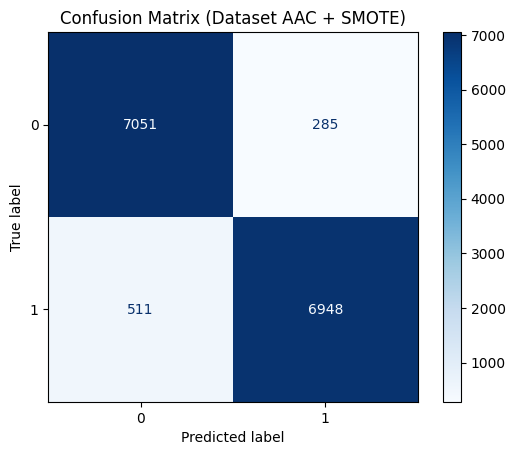

In [24]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_aac2, y_pred_aac2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset AAC + SMOTE)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_aac_sm.pkl', 'wb') as model_file:
    pickle.dump(model_aac2, model_file)

print("Model berhasil disimpan sebagai 'random_forest_aac_sm.pkl'")

Model berhasil disimpan sebagai 'random_forest_aac_sm.pkl'


SMOTEENN AAC

In [25]:
X_aac3 = fp_aac3.iloc[:,:-1]
y_aac3 = fp_aac3.iloc[:,-1:]

X_train_aac3, X_test_aac3, y_train_aac3, y_test_aac3 = train_test_split(X_aac3,y_aac3,test_size = 0.3, random_state = 42)

rf = RandomForestClassifier()
n_estimators = [10,50,100]
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3]

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf}

rf_random = GridSearchCV(estimator = rf, param_grid = grid,
                         cv = 2, scoring ='f1', verbose=10)

rf_random.fit(X_train_aac3,y_train_aac3)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_aac3 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_aac3.fit(X_train_aac3,y_train_aac3)
y_pred_aac3 = model_aac3.predict(X_test_aac3)

print("Classification Report")
print(classification_report(y_test_aac3,y_pred_aac3)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_aac3,y_pred_aac3)) #Corrected order of arguments
print("Precision :",precision_score(y_test_aac3,y_pred_aac3)) #Corrected order of arguments
print("Recall :",recall_score(y_test_aac3,y_pred_aac3)) #Corrected order of arguments
print("F-1 Score : ",f1_score(y_test_aac3,y_pred_aac3)) #Corrected order of arguments
print("AUROC:", roc_auc_score(y_test_aac3,y_pred_aac3)) #Corrected order of arguments

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.944 total time=   0.5s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.937 total time=   0.3s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.947 total time=   1.4s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.937 total time=   1.4s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.944 total time=   2.6s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   2.7s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.941 total time=   0.4s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.936 total time=   0.4s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.945 total time=   2.0s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.941 total time=   2.0s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.944 total time=   2.9s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.939 total time=   2.6s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.4s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.937 total time=   0.3s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.940 total time=   1.3s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.936 total time=   1.4s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.943 total time=   3.0s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.937 total time=   3.7s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.945 total time=   0.4s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.934 total time=   0.3s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.944 total time=   1.4s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.937 total time=   1.4s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.944 total time=   2.6s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.938 total time=   2.6s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.3s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.935 total time=   0.4s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.943 total time=   1.9s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.940 total time=   2.0s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.945 total time=   2.9s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.937 total time=   2.6s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.935 total time=   0.4s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.935 total time=   0.4s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.941 total time=   1.3s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.937 total time=   1.3s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.944 total time=   2.9s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.937 total time=   3.8s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.942 total time=   0.4s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.934 total time=   0.4s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.943 total time=   1.4s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.935 total time=   1.4s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.942 total time=   2.6s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.937 total time=   2.7s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.941 total time=   0.4s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.933 total time=   0.4s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.939 total time=   1.7s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.938 total time=   2.0s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.943 total time=   3.1s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.937 total time=   2.6s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.3s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.933 total time=   0.4s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.943 total time=   1.3s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.936 total time=   1.3s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.943 total time=   2.7s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.936 total time=   3.8s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.962 total time=   0.7s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.5s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.965 total time=   2.1s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.960 total time=   2.0s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.965 total time=   4.1s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   5.3s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.962 total time=   0.6s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.956 total time=   0.5s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.964 total time=   2.0s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.960 total time=   1.9s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.964 total time=   3.8s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.960 total time=   4.8s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.956 total time=   0.7s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.7s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.961 total time=   1.9s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.957 total time=   1.9s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.961 total time=   3.7s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.958 total time=   4.1s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.7s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.953 total time=   0.7s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.961 total time=   2.4s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.957 total time=   1.9s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.962 total time=   3.7s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.958 total time=   3.7s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.7s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.962 total time=   2.8s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.958 total time=   2.0s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.961 total time=   3.7s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.958 total time=   3.7s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.957 total time=   0.4s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.952 total time=   0.5s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.959 total time=   2.7s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.954 total time=   2.4s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.960 total time=   3.5s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.956 total time=   3.5s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.956 total time=   0.5s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.5s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.959 total time=   1.9s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.955 total time=   2.7s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.958 total time=   4.1s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.955 total time=   3.5s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.956 total time=   0.5s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.4s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.960 total time=   1.8s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.954 total time=   2.1s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.959 total time=   4.7s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.955 total time=   3.5s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.954 total time=   0.4s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.4s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.957 total time=   1.8s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.954 total time=   1.8s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.958 total time=   4.8s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.953 total time=   3.6s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.961 total time=   0.5s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.960 total time=   0.5s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.965 total time=   2.1s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.961 total time=   2.0s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.964 total time=   5.1s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.962 total time=   4.3s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.960 total time=   0.5s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.957 total time=   0.5s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.963 total time=   2.0s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.962 total time=   2.0s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.963 total time=   4.7s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.960 total time=   4.3s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.960 total time=   0.5s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.956 total time=   0.4s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.961 total time=   1.9s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.957 total time=   1.9s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.962 total time=   4.2s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.957 total time=   4.6s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.957 total time=   0.5s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.5s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.962 total time=   1.9s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.957 total time=   1.9s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.962 total time=   3.8s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.957 total time=   5.1s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.5s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.962 total time=   1.9s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.957 total time=   1.9s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.961 total time=   3.7s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.958 total time=   4.9s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.960 total time=   0.6s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.5s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.959 total time=   1.9s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.955 total time=   1.8s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.958 total time=   3.6s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.956 total time=   4.1s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.7s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.952 total time=   0.7s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.959 total time=   2.2s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.954 total time=   1.8s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.958 total time=   3.6s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.954 total time=   3.5s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.6s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.952 total time=   0.6s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.959 total time=   2.7s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.954 total time=   2.1s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.960 total time=   3.6s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.953 total time=   3.5s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.955 total time=   0.4s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.948 total time=   0.4s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.960 total time=   2.3s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.953 total time=   2.6s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.958 total time=   3.6s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.953 total time=   3.5s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.5s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.964 total time=   2.1s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.962 total time=   2.9s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.965 total time=   4.6s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.960 total time=   4.0s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.960 total time=   0.5s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.5s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.964 total time=   2.0s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.961 total time=   2.7s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.964 total time=   4.6s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.961 total time=   3.8s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.954 total time=   0.5s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.961 total time=   1.9s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.956 total time=   2.4s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.961 total time=   4.6s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.957 total time=   3.7s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.953 total time=   0.5s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.962 total time=   1.9s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.958 total time=   1.9s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.962 total time=   5.2s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.957 total time=   3.7s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.5s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.961 total time=   1.9s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.958 total time=   1.9s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.960 total time=   5.1s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.958 total time=   3.7s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.956 total time=   0.5s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.4s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.960 total time=   1.8s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.955 total time=   1.8s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.960 total time=   4.3s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.955 total time=   4.3s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.956 total time=   0.4s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.5s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.960 total time=   1.8s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.954 total time=   1.8s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.960 total time=   3.7s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.955 total time=   4.9s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.5s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.949 total time=   0.4s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.959 total time=   1.9s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.955 total time=   1.8s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.959 total time=   3.6s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.955 total time=   4.6s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.955 total time=   0.6s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.6s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.958 total time=   1.8s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.952 total time=   1.8s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.959 total time=   3.5s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.955 total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3399
           1       0.97      0.97      0.97      5274

    accuracy                           0.97      8673
   macro avg       0.96      0.97      0.96      8673
weighted avg       0.97      0.97      0.97      8673

Accuracy: 0.9662169952726853
Precision : 0.9737492866653985
Recall : 0.9706105422828972
F-1 Score :  0.9721773810654258
AUROC: 0.9650051828801953


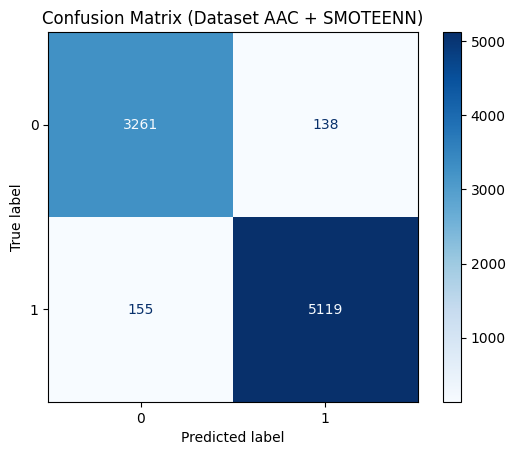

In [26]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_aac3, y_pred_aac3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset AAC + SMOTEENN)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_best_aac.pkl', 'wb') as model_file:
    pickle.dump(model_aac3, model_file)

print("Model berhasil disimpan sebagai 'random_forest_best_aac.pkl'")

Model berhasil disimpan sebagai 'random_forest_best_aac.pkl'


Random DC

In [27]:
fp_dc1

,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,dc_10,...,872,873,874,875,876,877,878,879,880,interaction
0,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49311,0.000000,0.000000,0.000000,0.008403,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49312,0.000000,0.000000,0.000000,0.008403,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49313,0.025210,0.004202,0.008403,0.004202,0.0,0.004202,0.000000,0.0,0.004202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49314,0.004202,0.004202,0.004202,0.000000,0.0,0.000000,0.004202,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:
# Use fp_dc1
X_dc1 = fp_dc1.iloc[:,:-1]
y_dc1 = fp_dc1.iloc[:,-1:]

X_train_dc1, X_test_dc1, y_train_dc1, y_test_dc1 = train_test_split(X_dc1,y_dc1,test_size = 0.3, random_state = 42)

rf_random.fit(X_train_dc1,y_train_dc1)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_dc1 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_dc1.fit(X_train_dc1,y_train_dc1)
y_pred_dc1 = model_dc1.predict(X_test_dc1)

print("Classification Report")
print(classification_report(y_test_dc1,y_pred_dc1)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_dc1,y_pred_dc1))
print("Precision :",precision_score(y_test_dc1,y_pred_dc1))
print("Recall :",recall_score(y_test_dc1,y_pred_dc1))
print("F-1 Score : ",f1_score(y_test_dc1,y_pred_dc1))
print("AUROC:", roc_auc_score(y_test_dc1,y_pred_dc1))


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.854 total time=   1.9s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.851 total time=   0.9s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.855 total time=   3.7s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.852 total time=   2.9s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.858 total time=   4.9s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.852 total time=   5.6s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.850 total time=   1.1s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.845 total time=   1.1s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.852 total time=   2.6s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.850 total time=   2.6s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.854 total time=   4.9s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.850 total time=   6.3s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.845 total time=   0.8s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.846 total time=   0.8s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.848 total time=   2.6s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.846 total time=   2.6s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.849 total time=   6.2s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.846 total time=   4.8s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.852 total time=   0.8s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.845 total time=   0.8s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.850 total time=   2.6s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.845 total time=   3.3s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.851 total time=   5.7s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.850 total time=   5.0s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.847 total time=   0.8s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.837 total time=   0.8s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.850 total time=   3.7s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.846 total time=   2.9s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.849 total time=   4.9s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.847 total time=   5.7s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.845 total time=   1.1s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.840 total time=   1.1s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.847 total time=   2.5s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.844 total time=   2.6s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.848 total time=   4.8s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.845 total time=   6.3s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.839 total time=   0.8s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.844 total time=   0.8s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.848 total time=   2.6s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.842 total time=   2.6s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.848 total time=   6.2s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.844 total time=   4.8s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.842 total time=   0.8s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.842 total time=   0.8s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.848 total time=   2.6s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.844 total time=   3.3s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.848 total time=   5.6s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.845 total time=   4.8s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.845 total time=   0.8s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.839 total time=   0.8s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.842 total time=   3.6s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.843 total time=   2.9s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.843 total time=   4.8s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.845 total time=   5.3s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.919 total time=   1.8s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.920 total time=   1.6s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.928 total time=   5.2s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.927 total time=   5.6s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=  10.9s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.924 total time=  11.5s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.905 total time=   1.2s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.905 total time=   1.2s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.915 total time=   5.2s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.915 total time=   5.1s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.913 total time=   9.2s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.913 total time=   9.4s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.891 total time=   1.1s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.893 total time=   1.1s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.899 total time=   5.4s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.901 total time=   4.0s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.899 total time=   8.5s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.901 total time=   8.3s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.892 total time=   1.1s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.889 total time=   1.1s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.900 total time=   5.4s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.897 total time=   4.3s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.901 total time=   8.7s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.899 total time=   8.6s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.892 total time=   1.1s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.889 total time=   1.1s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.898 total time=   5.3s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.897 total time=   4.2s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.897 total time=   8.3s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.897 total time=   8.5s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.881 total time=   1.0s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.881 total time=   1.0s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.888 total time=   4.7s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.887 total time=   4.4s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.889 total time=   7.2s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.889 total time=   8.7s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.878 total time=   1.0s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.878 total time=   1.0s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.885 total time=   3.8s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.886 total time=   5.2s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.886 total time=   7.3s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.887 total time=   8.8s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.884 total time=   1.0s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.881 total time=   1.5s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.886 total time=  12.6s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.886 total time=   8.0s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.886 total time=  14.5s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.886 total time=   9.3s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.874 total time=   1.6s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.872 total time=   1.0s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.881 total time=   3.6s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.879 total time=   4.9s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.881 total time=   7.1s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.882 total time=   8.5s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.922 total time=   1.3s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.923 total time=   1.3s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.927 total time=   5.1s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.924 total time=   6.6s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=  10.1s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.923 total time=  11.2s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.909 total time=   1.2s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.908 total time=   1.2s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.913 total time=   5.8s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.913 total time=   4.5s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.914 total time=  10.5s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.915 total time=   8.7s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.893 total time=   1.5s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.892 total time=   1.5s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.899 total time=   4.5s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.901 total time=   4.1s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.898 total time=   9.2s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.902 total time=  11.6s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.891 total time=   1.5s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.890 total time=   1.1s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.898 total time=   4.1s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.897 total time=   4.1s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.900 total time=   9.4s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.898 total time=   9.0s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.893 total time=   1.4s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.889 total time=   1.1s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.899 total time=   4.0s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.896 total time=   4.0s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.899 total time=   9.1s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.897 total time=   8.4s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.882 total time=   1.4s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.885 total time=   1.2s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.888 total time=   4.1s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.889 total time=   3.7s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.889 total time=   8.6s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.889 total time=   7.2s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.878 total time=   1.3s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.878 total time=   1.4s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.883 total time=   4.4s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.885 total time=   3.8s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.886 total time=   8.5s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.887 total time=   7.2s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.883 total time=   1.0s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.878 total time=   1.1s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.888 total time=   5.3s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.884 total time=   3.8s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.886 total time=   7.8s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.887 total time=   8.2s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.875 total time=   1.0s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.874 total time=   1.0s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.882 total time=   4.9s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.879 total time=   4.4s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.882 total time=   7.0s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.881 total time=   8.4s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.922 total time=   1.3s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.919 total time=   1.3s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.927 total time=   5.3s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.926 total time=   6.3s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=  10.9s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.924 total time=  10.4s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.908 total time=   1.5s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.908 total time=   1.7s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.912 total time=   5.0s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.914 total time=   4.5s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.915 total time=  10.0s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.915 total time=   9.5s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.895 total time=   1.6s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.893 total time=   1.1s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.899 total time=   4.1s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.902 total time=   4.1s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.901 total time=   9.1s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.902 total time=   8.5s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.895 total time=   1.6s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.894 total time=   1.3s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.898 total time=   4.2s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.898 total time=   4.1s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.899 total time=   9.3s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.898 total time=   8.7s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.887 total time=   1.6s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.889 total time=   1.2s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.896 total time=   4.1s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.896 total time=   4.0s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.896 total time=   9.2s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.896 total time=   8.3s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.881 total time=   1.4s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.881 total time=   1.4s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.889 total time=   3.8s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.888 total time=   3.8s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.888 total time=   8.6s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.888 total time=   7.3s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.876 total time=   1.1s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.879 total time=   1.5s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.886 total time=   4.7s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.885 total time=   3.9s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.887 total time=   8.6s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.887 total time=   7.3s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.880 total time=   1.0s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.877 total time=   1.0s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.884 total time=   5.2s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.883 total time=   3.9s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.885 total time=   7.8s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.885 total time=   8.2s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.873 total time=   1.0s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.874 total time=   1.0s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.882 total time=   4.1s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.879 total time=   4.6s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.882 total time=   7.0s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.880 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.95      7336
           1       0.93      0.99      0.96      7459

    accuracy                           0.96     14795
   macro avg       0.96      0.96      0.96     14795
weighted avg       0.96      0.96      0.96     14795

Accuracy: 0.9562014193984454
Precision : 0.9306943214872897
Recall : 0.9865933771283014
F-1 Score :  0.9578289730573994
AUROC: 0.9559466340385236


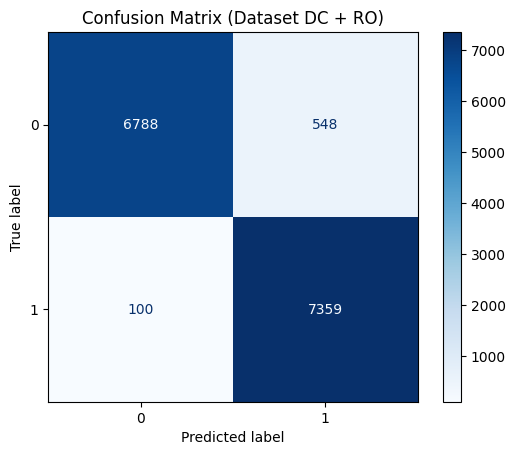

In [29]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_dc1, y_pred_dc1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset DC + RO)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_dc_ro.pkl', 'wb') as model_file:
    pickle.dump(model_dc1, model_file)

print("Model berhasil disimpan sebagai 'random_forest_dc_ro.pkl'")

Model berhasil disimpan sebagai 'random_forest_dc_ro.pkl'


SMOTE DC

In [30]:
fp_dc2

,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,dc_10,...,872,873,874,875,876,877,878,879,880,interaction
0,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49311,0.004202,0.004202,0.004202,0.000000,0.0,0.000000,0.004202,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49312,0.000000,0.007950,0.004428,0.000000,0.0,0.000000,0.006643,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49313,0.004202,0.008403,0.000000,0.000000,0.0,0.008403,0.000000,0.004202,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49314,0.000000,0.000000,0.000000,0.008403,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [34]:
X_dc2 = fp_dc2.iloc[:,:-1]
y_dc2 = fp_dc2.iloc[:,-1:]

X_train_dc2, X_test_dc2, y_train_dc2, y_test_dc2 = train_test_split(X_dc2,y_dc2,test_size = 0.3, random_state = 42)

rf_random.fit(X_train_dc2,y_train_dc2)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_dc2 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_dc2.fit(X_train_dc2,y_train_dc2)
y_pred_dc2 = model_dc2.predict(X_test_dc2)

print("Classification Report")
print(classification_report(y_test_dc2,y_pred_dc2)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_dc2,y_pred_dc2))
print("Precision :",precision_score(y_test_dc2,y_pred_dc2))
print("Recall :",recall_score(y_test_dc2,y_pred_dc2))
print("F-1 Score : ",f1_score(y_test_dc2,y_pred_dc2))
print("AUROC:", roc_auc_score(y_test_dc2,y_pred_dc2))


Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.911 total time=   1.4s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.909 total time=   0.9s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.909 total time=   3.2s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.908 total time=   3.2s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.911 total time=   7.6s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.908 total time=   6.8s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.909 total time=   0.9s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.904 total time=   0.9s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.908 total time=   4.6s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.910 total time=   3.2s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.910 total time=   6.1s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.907 total time=   7.7s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.9s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.904 total time=   0.9s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.908 total time=   3.2s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.908 total time=   3.4s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.909 total time=   7.1s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.906 total time=   6.0s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.908 total time=   1.1s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.906 total time=   1.3s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.910 total time=   4.1s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.908 total time=   3.2s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.909 total time=   7.0s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.907 total time=   7.1s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.9s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.907 total time=   0.9s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.909 total time=   3.2s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.907 total time=   4.2s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.909 total time=   6.5s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.906 total time=   6.6s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.906 total time=   1.3s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.906 total time=   1.3s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.911 total time=   3.2s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.907 total time=   3.2s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.910 total time=   7.0s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.906 total time=   6.4s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.907 total time=   0.9s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.903 total time=   0.9s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.908 total time=   3.1s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.906 total time=   4.5s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.910 total time=   6.1s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.906 total time=   7.1s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.909 total time=   1.3s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.905 total time=   1.0s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.909 total time=   3.2s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.904 total time=   3.2s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.911 total time=   7.5s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.906 total time=   6.1s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.907 total time=   0.9s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.903 total time=   0.9s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.908 total time=   3.6s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.908 total time=   4.7s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.909 total time=   6.1s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.905 total time=   7.5s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.931 total time=   1.2s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   1.2s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.937 total time=   4.8s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.936 total time=   5.8s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.937 total time=   9.7s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=  10.7s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.930 total time=   1.2s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.929 total time=   1.1s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.937 total time=   5.1s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.934 total time=   5.1s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.938 total time=   9.0s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.935 total time=   9.4s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.929 total time=   1.1s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.924 total time=   1.1s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.933 total time=   5.5s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.932 total time=   4.3s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.932 total time=   9.0s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.931 total time=   8.5s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.928 total time=   1.1s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.926 total time=   1.1s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.933 total time=   5.6s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   4.2s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.935 total time=   9.4s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.931 total time=   8.3s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.929 total time=   1.1s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.926 total time=   1.2s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.932 total time=   5.5s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.929 total time=   4.2s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.934 total time=   9.5s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.930 total time=   8.1s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.924 total time=   1.1s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.926 total time=   1.3s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.930 total time=   5.2s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.927 total time=   4.0s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.932 total time=   9.1s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.928 total time=   7.7s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.925 total time=   1.1s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.924 total time=   1.1s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.930 total time=   5.5s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.924 total time=   4.1s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.928 total time=   9.0s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.926 total time=   8.2s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.924 total time=   1.1s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.923 total time=   1.1s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.928 total time=   5.6s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.925 total time=   4.1s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.929 total time=   9.0s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.927 total time=   8.1s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.924 total time=   1.1s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.920 total time=   1.1s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.926 total time=   5.3s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.924 total time=   4.0s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.927 total time=   8.4s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.923 total time=   8.2s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.933 total time=   1.2s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.930 total time=   1.2s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.937 total time=   6.2s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.935 total time=   4.8s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.937 total time=  10.7s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=   9.7s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.931 total time=   1.7s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.932 total time=   1.6s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.937 total time=   4.5s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.932 total time=   4.4s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.937 total time=  10.0s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.934 total time=   9.7s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.927 total time=   1.3s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.927 total time=   1.1s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.933 total time=   4.2s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.932 total time=   4.2s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.933 total time=   9.3s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.931 total time=   9.5s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.928 total time=   1.1s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.925 total time=   1.1s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.933 total time=   4.2s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   4.6s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   9.2s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.930 total time=   9.5s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.928 total time=   1.1s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.926 total time=   1.1s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.932 total time=   4.1s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.929 total time=   4.7s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.934 total time=   8.9s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.929 total time=   9.5s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.926 total time=   1.1s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.921 total time=   1.1s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.930 total time=   4.0s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.927 total time=   4.6s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.930 total time=   8.6s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.928 total time=   9.3s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.925 total time=   1.1s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.921 total time=   1.1s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.928 total time=   4.1s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.926 total time=   4.7s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.928 total time=   8.7s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.926 total time=   9.2s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.926 total time=   1.1s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.922 total time=   1.1s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.929 total time=   4.1s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.926 total time=   4.5s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.929 total time=   8.7s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.925 total time=   9.2s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.922 total time=   1.1s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.920 total time=   1.1s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.927 total time=   4.0s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.925 total time=   4.2s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.928 total time=   8.8s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.924 total time=   8.7s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.932 total time=   1.5s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.932 total time=   1.4s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.936 total time=   5.1s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.935 total time=   5.7s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   9.8s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=  10.6s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.932 total time=   1.2s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.927 total time=   1.1s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.937 total time=   4.9s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.933 total time=   5.3s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.937 total time=   8.8s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.935 total time=   9.5s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.927 total time=   1.1s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.927 total time=   1.1s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.933 total time=   5.4s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.932 total time=   4.5s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.934 total time=   8.8s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.931 total time=   8.7s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.928 total time=   1.1s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.929 total time=   1.1s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.932 total time=   5.6s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.931 total time=   4.2s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.933 total time=   9.0s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.931 total time=   8.6s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.926 total time=   1.1s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.926 total time=   1.1s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.933 total time=   5.7s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.930 total time=   4.2s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.933 total time=   9.5s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.930 total time=   8.1s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.926 total time=   1.1s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.922 total time=   1.1s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.929 total time=   5.4s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.927 total time=   4.1s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.929 total time=   9.0s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.927 total time=   8.0s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.925 total time=   1.1s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.923 total time=   1.1s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.928 total time=   5.5s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.925 total time=   4.0s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.929 total time=   9.0s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.926 total time=   8.0s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.927 total time=   1.1s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.922 total time=   1.0s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.928 total time=   5.4s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.926 total time=   4.1s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.929 total time=   8.7s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.927 total time=   8.3s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.924 total time=   1.1s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.921 total time=   1.1s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.928 total time=   5.7s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.923 total time=   4.0s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.927 total time=   8.3s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.925 total time=   8.4s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}  



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7336
           1       0.96      0.93      0.95      7459

    accuracy                           0.95     14795
   macro avg       0.95      0.95      0.95     14795
weighted avg       0.95      0.95      0.95     14795

Accuracy: 0.9455221358567083
Precision : 0.960797894445214
Recall : 0.9298833623810162
F-1 Score :  0.9450878866330563
AUROC: 0.9456532406234415


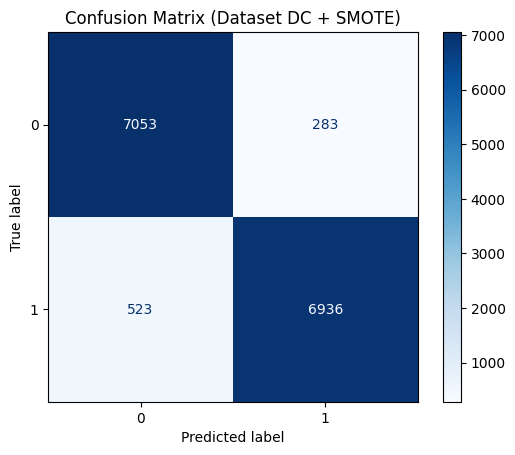

In [35]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_dc2, y_pred_dc2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset DC + SMOTE)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_dc_sm.pkl', 'wb') as model_file:
    pickle.dump(model_dc2, model_file)

print("Model berhasil disimpan sebagai 'random_forest_dc_sm.pkl'")

Model berhasil disimpan sebagai 'random_forest_dc_sm.pkl'


SMOTEENN DC

In [36]:
X_dc3 = fp_dc3.iloc[:,:-1]
y_dc3 = fp_dc3.iloc[:,-1:]

X_train_dc3, X_test_dc3, y_train_dc3, y_test_dc3 = train_test_split(X_dc3,y_dc3,test_size = 0.3, random_state = 42)

rf = RandomForestClassifier()
n_estimators = [10,50,100]
max_depth = [10,50,100,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3]

grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf}

rf_random = GridSearchCV(estimator = rf, param_grid = grid,
                         cv = 2, scoring ='f1', verbose=10)

rf_random.fit(X_train_dc3,y_train_dc3)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_dc3 = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_dc3.fit(X_train_dc3,y_train_dc3)
y_pred_dc3 = model_dc3.predict(X_test_dc3)

print("Classification Report")
print(classification_report(y_test_dc3,y_pred_dc3)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_dc3,y_pred_dc3)) #Corrected order of arguments
print("Precision :",precision_score(y_test_dc3,y_pred_dc3)) #Corrected order of arguments
print("Recall :",recall_score(y_test_dc3,y_pred_dc3)) #Corrected order of arguments
print("F-1 Score : ",f1_score(y_test_dc3,y_pred_dc3)) #Corrected order of arguments
print("AUROC:", roc_auc_score(y_test_dc3,y_pred_dc3)) #Corrected order of arguments

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.948 total time=   1.2s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.943 total time=   0.6s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.948 total time=   2.7s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.943 total time=   3.0s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.949 total time=   4.0s
[CV 2/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 3/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.945 total time=   4.1s
[CV 1/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.945 total time=   0.6s
[CV 2/2; 4/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 4/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.943 total time=   0.6s
[CV 1/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.947 total time=   2.9s
[CV 2/2; 5/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 5/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.943 total time=   2.8s
[CV 1/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.949 total time=   4.1s
[CV 2/2; 6/108] START max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 6/108] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.944 total time=   4.0s
[CV 1/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.943 total time=   0.6s
[CV 2/2; 7/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 7/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.943 total time=   0.6s
[CV 1/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.947 total time=   3.1s
[CV 2/2; 8/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 8/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.942 total time=   2.5s
[CV 1/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.947 total time=   4.0s
[CV 2/2; 9/108] START max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 9/108] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.942 total time=   4.0s
[CV 1/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.943 total time=   0.6s
[CV 2/2; 10/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 10/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.942 total time=   0.8s
[CV 1/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.950 total time=   3.0s
[CV 2/2; 11/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 11/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.943 total time=   2.4s
[CV 1/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.948 total time=   4.0s
[CV 2/2; 12/108] START max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 12/108] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.944 total time=   4.0s
[CV 1/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.946 total time=   0.6s
[CV 2/2; 13/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 13/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.941 total time=   0.9s
[CV 1/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.949 total time=   3.1s
[CV 2/2; 14/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 14/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.942 total time=   2.3s
[CV 1/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.947 total time=   4.4s
[CV 2/2; 15/108] START max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 15/108] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.943 total time=   4.2s
[CV 1/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.946 total time=   0.9s
[CV 2/2; 16/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 16/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.942 total time=   0.8s
[CV 1/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.947 total time=   2.9s
[CV 2/2; 17/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 17/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.941 total time=   2.1s
[CV 1/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.947 total time=   4.0s
[CV 2/2; 18/108] START max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 18/108] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.943 total time=   4.2s
[CV 1/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.943 total time=   0.9s
[CV 2/2; 19/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 19/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.942 total time=   0.8s
[CV 1/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.946 total time=   2.8s
[CV 2/2; 20/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 20/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.942 total time=   2.1s
[CV 1/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.947 total time=   4.0s
[CV 2/2; 21/108] START max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 21/108] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.942 total time=   4.4s
[CV 1/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.945 total time=   0.9s
[CV 2/2; 22/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 22/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.940 total time=   0.9s
[CV 1/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.948 total time=   2.6s
[CV 2/2; 23/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 23/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.940 total time=   2.1s
[CV 1/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.947 total time=   4.0s
[CV 2/2; 24/108] START max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 24/108] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.943 total time=   4.6s
[CV 1/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.945 total time=   0.8s
[CV 2/2; 25/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 25/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.939 total time=   0.8s
[CV 1/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.948 total time=   2.4s
[CV 2/2; 26/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 26/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.942 total time=   2.1s
[CV 1/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.948 total time=   4.0s
[CV 2/2; 27/108] START max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 27/108] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.941 total time=   4.6s
[CV 1/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   1.0s
[CV 2/2; 28/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 28/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.954 total time=   1.0s
[CV 1/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.962 total time=   2.9s
[CV 2/2; 29/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 29/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   2.7s
[CV 1/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   5.3s
[CV 2/2; 30/108] START max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 30/108] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.959 total time=   6.4s
[CV 1/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.958 total time=   0.7s
[CV 2/2; 31/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 31/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.7s
[CV 1/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.961 total time=   2.6s
[CV 2/2; 32/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 32/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.957 total time=   2.6s
[CV 1/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.961 total time=   6.3s
[CV 2/2; 33/108] START max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 33/108] END max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.958 total time=   5.0s
[CV 1/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 34/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 34/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.7s
[CV 1/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.958 total time=   2.5s
[CV 2/2; 35/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 35/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.954 total time=   4.0s
[CV 1/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.958 total time=   5.1s
[CV 2/2; 36/108] START max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 36/108] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.954 total time=   4.8s
[CV 1/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.956 total time=   0.7s
[CV 2/2; 37/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 37/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.949 total time=   0.7s
[CV 1/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.959 total time=   3.7s
[CV 2/2; 38/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 38/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.956 total time=   2.7s
[CV 1/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.959 total time=   4.8s
[CV 2/2; 39/108] START max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 39/108] END max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.956 total time=   5.6s
[CV 1/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.957 total time=   1.0s
[CV 2/2; 40/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 40/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.951 total time=   0.9s
[CV 1/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.957 total time=   2.5s
[CV 2/2; 41/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 41/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.954 total time=   2.4s
[CV 1/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.959 total time=   4.8s
[CV 2/2; 42/108] START max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 42/108] END max_depth=50, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.956 total time=   6.2s
[CV 1/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.955 total time=   0.7s
[CV 2/2; 43/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 43/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.950 total time=   0.7s
[CV 1/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.955 total time=   2.4s
[CV 2/2; 44/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 44/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.951 total time=   2.4s
[CV 1/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.956 total time=   5.5s
[CV 2/2; 45/108] START max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 45/108] END max_depth=50, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.952 total time=   5.1s
[CV 1/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.953 total time=   0.6s
[CV 2/2; 46/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 46/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.948 total time=   0.7s
[CV 1/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.955 total time=   2.5s
[CV 2/2; 47/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 47/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.953 total time=   2.4s
[CV 1/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.955 total time=   6.1s
[CV 2/2; 48/108] START max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 48/108] END max_depth=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.953 total time=   4.6s
[CV 1/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.7s
[CV 2/2; 49/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 49/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.951 total time=   0.7s
[CV 1/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.954 total time=   2.4s
[CV 2/2; 50/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 50/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.953 total time=   3.3s
[CV 1/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.956 total time=   5.2s
[CV 2/2; 51/108] START max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 51/108] END max_depth=50, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.952 total time=   4.6s
[CV 1/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.6s
[CV 2/2; 52/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 52/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.948 total time=   0.6s
[CV 1/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.954 total time=   3.1s
[CV 2/2; 53/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 53/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.951 total time=   3.1s
[CV 1/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.956 total time=   4.6s
[CV 2/2; 54/108] START max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 54/108] END max_depth=50, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.951 total time=   4.6s
[CV 1/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   1.0s
[CV 2/2; 55/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 55/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.954 total time=   1.0s
[CV 1/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.963 total time=   3.5s
[CV 2/2; 56/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 56/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   2.7s
[CV 1/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   5.3s
[CV 2/2; 57/108] START max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 57/108] END max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.958 total time=   6.6s
[CV 1/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 58/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 58/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.7s
[CV 1/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.960 total time=   2.6s
[CV 2/2; 59/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 59/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.957 total time=   2.6s
[CV 1/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.960 total time=   6.2s
[CV 2/2; 60/108] START max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 60/108] END max_depth=100, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.957 total time=   5.1s
[CV 1/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 61/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 61/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.7s
[CV 1/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.958 total time=   2.5s
[CV 2/2; 62/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 62/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.953 total time=   2.9s
[CV 1/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.958 total time=   5.8s
[CV 2/2; 63/108] START max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 63/108] END max_depth=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.954 total time=   4.7s
[CV 1/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.7s
[CV 2/2; 64/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 64/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.952 total time=   0.7s
[CV 1/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.958 total time=   3.0s
[CV 2/2; 65/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 65/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.955 total time=   3.4s
[CV 1/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.959 total time=   4.8s
[CV 2/2; 66/108] START max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 66/108] END max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.955 total time=   4.8s
[CV 1/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.953 total time=   0.9s
[CV 2/2; 67/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 67/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.953 total time=   1.0s
[CV 1/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.957 total time=   3.3s
[CV 2/2; 68/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 68/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.955 total time=   2.5s
[CV 1/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.958 total time=   4.8s
[CV 2/2; 69/108] START max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 69/108] END max_depth=100, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.954 total time=   5.9s
[CV 1/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.954 total time=   0.9s
[CV 2/2; 70/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 70/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.949 total time=   0.7s
[CV 1/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.957 total time=   2.4s
[CV 2/2; 71/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 71/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.953 total time=   2.4s
[CV 1/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.957 total time=   4.8s
[CV 2/2; 72/108] START max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 72/108] END max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.953 total time=   5.9s
[CV 1/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.7s
[CV 2/2; 73/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 73/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.6s
[CV 1/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.955 total time=   2.4s
[CV 2/2; 74/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 74/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.952 total time=   2.4s
[CV 1/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.956 total time=   5.9s
[CV 2/2; 75/108] START max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 75/108] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.952 total time=   4.9s
[CV 1/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.955 total time=   0.7s
[CV 2/2; 76/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 76/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.949 total time=   0.7s
[CV 1/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.954 total time=   2.4s
[CV 2/2; 77/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 77/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.952 total time=   2.6s
[CV 1/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.956 total time=   5.9s
[CV 2/2; 78/108] START max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 78/108] END max_depth=100, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.953 total time=   4.6s
[CV 1/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.954 total time=   0.7s
[CV 2/2; 79/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 79/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.950 total time=   0.6s
[CV 1/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.955 total time=   2.5s
[CV 2/2; 80/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 80/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.951 total time=   3.5s
[CV 1/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.954 total time=   4.7s
[CV 2/2; 81/108] START max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 81/108] END max_depth=100, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.952 total time=   4.5s
[CV 1/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   0.7s
[CV 2/2; 82/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 82/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.954 total time=   0.7s
[CV 1/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.962 total time=   4.0s
[CV 2/2; 83/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 83/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.958 total time=   2.8s
[CV 1/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.961 total time=   5.3s
[CV 2/2; 84/108] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 84/108] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.959 total time=   6.5s
[CV 1/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.959 total time=   0.8s
[CV 2/2; 85/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 85/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.955 total time=   0.7s
[CV 1/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.960 total time=   2.6s
[CV 2/2; 86/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 86/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.957 total time=   2.6s
[CV 1/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.961 total time=   5.5s
[CV 2/2; 87/108] START max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 87/108] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.958 total time=   5.8s
[CV 1/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.956 total time=   0.7s
[CV 2/2; 88/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 88/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.7s
[CV 1/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.957 total time=   2.5s
[CV 2/2; 89/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 89/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.954 total time=   2.5s
[CV 1/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.958 total time=   6.2s
[CV 2/2; 90/108] START max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 90/108] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.954 total time=   4.8s
[CV 1/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 91/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 91/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.953 total time=   0.7s
[CV 1/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.958 total time=   2.6s
[CV 2/2; 92/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 92/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.955 total time=   3.6s
[CV 1/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.957 total time=   5.2s
[CV 2/2; 93/108] START max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 93/108] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.955 total time=   4.8s
[CV 1/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.957 total time=   0.7s
[CV 2/2; 94/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 94/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.951 total time=   0.8s
[CV 1/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.958 total time=   3.6s
[CV 2/2; 95/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 95/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.955 total time=   2.6s
[CV 1/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.958 total time=   4.9s
[CV 2/2; 96/108] START max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 96/108] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.955 total time=   5.7s
[CV 1/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.955 total time=   1.0s
[CV 2/2; 97/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 97/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.951 total time=   0.9s
[CV 1/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.956 total time=   2.5s
[CV 2/2; 98/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 98/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.951 total time=   2.5s
[CV 1/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.955 total time=   4.7s
[CV 2/2; 99/108] START max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 99/108] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.954 total time=   6.1s
[CV 1/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.951 total time=   0.7s
[CV 2/2; 100/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 100/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.948 total time=   0.6s
[CV 1/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.956 total time=   2.5s
[CV 2/2; 101/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 101/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=50;, score=0.951 total time=   2.4s
[CV 1/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.955 total time=   5.6s
[CV 2/2; 102/108] START max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 102/108] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.953 total time=   5.1s
[CV 1/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.954 total time=   0.7s
[CV 2/2; 103/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 103/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=10;, score=0.950 total time=   0.6s
[CV 1/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.956 total time=   2.4s
[CV 2/2; 104/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 104/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.952 total time=   2.4s
[CV 1/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.956 total time=   6.1s
[CV 2/2; 105/108] START max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 105/108] END max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.953 total time=   4.6s
[CV 1/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.953 total time=   0.7s
[CV 2/2; 106/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 106/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=10;, score=0.948 total time=   0.6s
[CV 1/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.954 total time=   2.4s
[CV 2/2; 107/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 107/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.951 total time=   3.4s
[CV 1/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.955 total time=   5.1s
[CV 2/2; 108/108] START max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/2; 108/108] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.951 total time=   4.6s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters:  {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}  



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3603
           1       0.98      0.96      0.97      5439

    accuracy                           0.97      9042
   macro avg       0.96      0.97      0.96      9042
weighted avg       0.97      0.97      0.97      9042

Accuracy: 0.9652731696527317
Precision : 0.9779891811229249
Recall : 0.963963963963964
F-1 Score :  0.970925925925926
AUROC: 0.9656067391288039


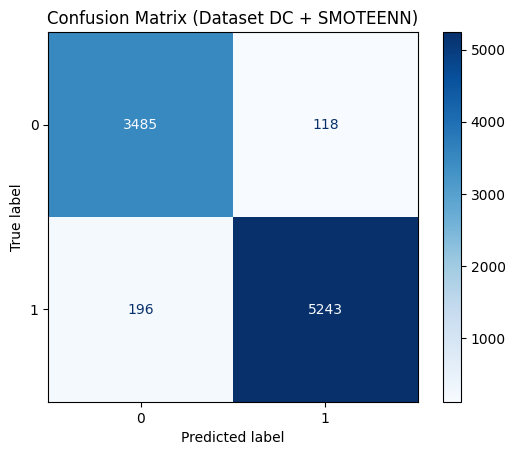

In [37]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_dc3, y_pred_dc3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset DC + SMOTEENN)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_best_dc.pkl', 'wb') as model_file:
    pickle.dump(model_dc3, model_file)

print("Model berhasil disimpan sebagai 'random_forest_best_dc.pkl'")

Model berhasil disimpan sebagai 'random_forest_best_dc.pkl'


Imbalance DC

In [38]:
fp_dc
X_dc = fp_dc.iloc[:,3:]
y_dc = fp_dc.iloc[:,2]

In [39]:
X_dc

,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9,dc_10,...,871,872,873,874,875,876,877,878,879,880
0,0.00000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.008403,0.000000,0.0,0.000000,0.012605,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29295,0.02521,0.004202,0.008403,0.004202,0.0,0.004202,0.000000,0.0,0.004202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29296,0.02521,0.004202,0.008403,0.004202,0.0,0.004202,0.000000,0.0,0.004202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29297,0.02521,0.004202,0.008403,0.004202,0.0,0.004202,0.000000,0.0,0.004202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29298,0.02521,0.004202,0.008403,0.004202,0.0,0.004202,0.000000,0.0,0.004202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_train_dc, X_test_dc, y_train_dc, y_test_dc = train_test_split(X_dc,y_dc,test_size = 0.3, random_state = 42)

rf_random.fit(X_train_dc,y_train_dc)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_dc = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_dc.fit(X_train_dc,y_train_dc)
y_pred_dc = model_dc.predict(X_test_dc)

print("Classification Report")
print(classification_report(y_test_dc,y_pred_dc)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_dc,y_pred_dc))
print("Precision :",precision_score(y_test_dc,y_pred_dc))
print("Recall :",recall_score(y_test_dc,y_pred_dc))
print("F-1 Score : ",f1_score(y_test_dc,y_pred_dc))
print("AUROC:", roc_auc_score(y_test_dc,y_pred_dc))

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.583 total time=   1.2s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.587 total time=   0.7s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.598 total time=   1.7s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.601 total time=   3.3s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_s

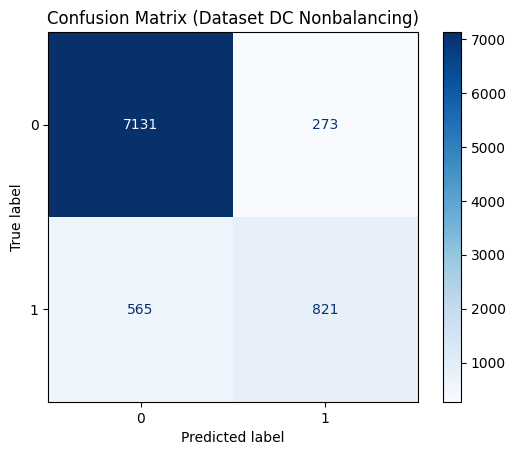

In [41]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_dc, y_pred_dc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset DC Nonbalancing)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_dc_im.pkl', 'wb') as model_file:
    pickle.dump(model_dc, model_file)

print("Model berhasil disimpan sebagai 'random_forest_dc_im.pkl'")

Model berhasil disimpan sebagai 'random_forest_dc_im.pkl'


Imbalance AAC

In [42]:
X_aac = fp_aac.iloc[:,3:]
y_aac = fp_aac.iloc[:,2]
X_train_aac, X_test_aac, y_train_aac, y_test_aac = train_test_split(X_aac,y_aac,test_size = 0.3, random_state = 42)

rf_random.fit(X_train_aac,y_train_aac)
print('Best Parameters: ', rf_random.best_params_, ' \n')

model_aac = RandomForestClassifier(**rf_random.best_params_) # Use best parameters from grid search
model_aac.fit(X_train_aac,y_train_aac)
y_pred_aac = model_aac.predict(X_test_aac)

print("Classification Report")
print(classification_report(y_test_aac,y_pred_aac)) #Corrected order of arguments
print("Accuracy:",accuracy_score(y_test_aac,y_pred_aac))
print("Precision :",precision_score(y_test_aac,y_pred_aac))
print("Recall :",recall_score(y_test_aac,y_pred_aac))
print("F-1 Score : ",f1_score(y_test_aac,y_pred_aac))
print("AUROC:", roc_auc_score(y_test_aac,y_pred_aac))

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.491 total time=   0.7s
[CV 2/2; 1/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/2; 1/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.507 total time=   0.5s
[CV 1/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.560 total time=   1.2s
[CV 2/2; 2/108] START max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/2; 2/108] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.561 total time=   1.2s
[CV 1/2; 3/108] START max_depth=10, min_samples_leaf=1, min_samples_s

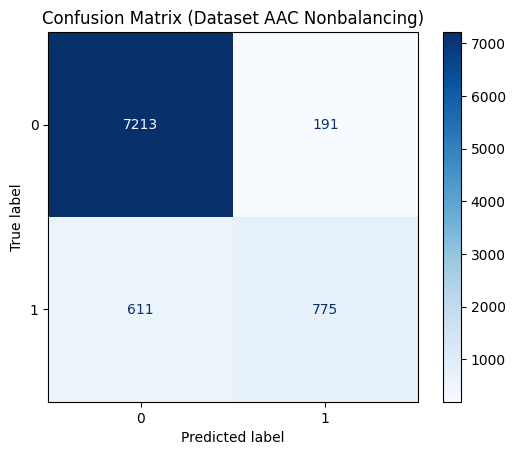

In [46]:
# prompt: confusion matrix heatmap

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test_aac, y_pred_aac)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_aac1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Dataset AAC Nonbalancing)')
plt.show()


In [ ]:
import pickle

with open('/content/drive/MyDrive/Skripsi/Program/random_forest_aac_im.pkl', 'wb') as model_file:
    pickle.dump(model_aac, model_file)

print("Model berhasil disimpan sebagai 'random_forest_aac_im.pkl'")

Model berhasil disimpan sebagai 'random_forest_aac_im.pkl'


ROC

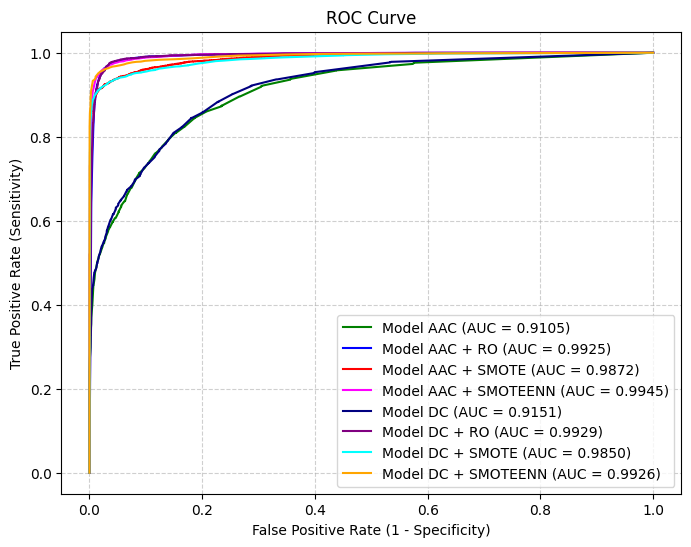

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Pastikan variabel model_aac1, model_aac2, ..., model_dc3 sudah terlatih

# Prediksi probabilitas dari masing-masing model
y_probs = {
    "Model AAC": model_aac.predict_proba(X_test_aac)[:, 1],
    "Model AAC + RO": model_aac1.predict_proba(X_test_aac1)[:, 1],
    "Model AAC + SMOTE": model_aac2.predict_proba(X_test_aac2)[:, 1],
    "Model AAC + SMOTEENN": model_aac3.predict_proba(X_test_aac3)[:, 1],
    "Model DC": model_dc.predict_proba(X_test_dc)[:, 1],
    "Model DC + RO": model_dc1.predict_proba(X_test_dc1)[:, 1],
    "Model DC + SMOTE": model_dc2.predict_proba(X_test_dc2)[:, 1],
    "Model DC + SMOTEENN": model_dc3.predict_proba(X_test_dc3)[:, 1]
}

# Ground truth (label asli) dari masing-masing model
y_trues = {
    "Model AAC": y_test_aac,
    "Model AAC + RO": y_test_aac1,
    "Model AAC + SMOTE": y_test_aac2,
    "Model AAC + SMOTEENN": y_test_aac3,
    "Model DC": y_test_dc,
    "Model DC + RO": y_test_dc1,
    "Model DC + SMOTE": y_test_dc2,
    "Model DC + SMOTEENN": y_test_dc3
}

# Warna untuk masing-masing model (6 model)
colors = ['green', 'blue', 'red', 'magenta', 'navy', 'purple', 'cyan', 'orange']

plt.figure(figsize=(8, 6))

# Loop untuk setiap model dengan y_true yang sesuai
for (model, y_prob), color in zip(y_probs.items(), colors):
    y_true = y_trues[model]  # Ambil y_true yang sesuai untuk model ini
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f"{model} (AUC = {roc_auc:.4f})")

# Format plot
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)

# Tampilkan plot
plt.show()


PRC

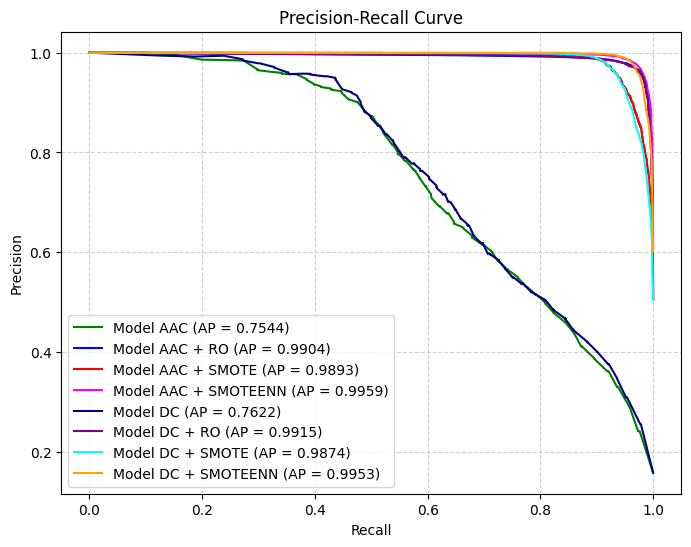

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Pastikan model-model sudah terlatih dan tersedia
# Prediksi probabilitas dari masing-masing model
y_probs = {
    "Model AAC": model_aac.predict_proba(X_test_aac)[:, 1],
    "Model AAC + RO": model_aac1.predict_proba(X_test_aac1)[:, 1],
    "Model AAC + SMOTE": model_aac2.predict_proba(X_test_aac2)[:, 1],
    "Model AAC + SMOTEENN": model_aac3.predict_proba(X_test_aac3)[:, 1],
    "Model DC": model_dc.predict_proba(X_test_dc)[:, 1],
    "Model DC + RO": model_dc1.predict_proba(X_test_dc1)[:, 1],
    "Model DC + SMOTE": model_dc2.predict_proba(X_test_dc2)[:, 1],
    "Model DC + SMOTEENN": model_dc3.predict_proba(X_test_dc3)[:, 1]
}

# Ground truth (label asli) dari masing-masing model
y_trues = {
    "Model AAC": y_test_aac,
    "Model AAC + RO": y_test_aac1,
    "Model AAC + SMOTE": y_test_aac2,
    "Model AAC + SMOTEENN": y_test_aac3,
    "Model DC": y_test_dc,
    "Model DC + RO": y_test_dc1,
    "Model DC + SMOTE": y_test_dc2,
    "Model DC + SMOTEENN": y_test_dc3
}

# Warna untuk masing-masing model
colors = ['green', 'blue', 'red', 'magenta', 'navy', 'purple', 'cyan', 'orange']

plt.figure(figsize=(8, 6))

# Loop untuk setiap model
for (model, y_prob), color in zip(y_probs.items(), colors):
    y_true = y_trues[model]  # Ambil label yang sesuai
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    avg_precision = average_precision_score(y_true, y_prob)
    plt.plot(recall, precision, color=color, label=f"{model} (AP = {avg_precision:.4f})")

# Format plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True, linestyle="--", alpha=0.6)

# Tampilkan plot
plt.show()